Devem ser utilizados pelo menos os seguintes algoritmos: 1) K-Means, 2) DBSCAN; 3) Agglomerative Clustering. Utilize o ficheiro com o nome “segmentation data.csv” para realizar a sua análise. As principais conclusões que devem ser retiraram devem ter em consideração as seguintes dimensões:
* Número de perfis de clientes segmentados;
* Principais características dos clientes segmentados;
* Perfil dos clientes maioritários e minoritários / qual o perfil mais dominante e menos
dominante;
* Existem clusters bem separados ou onde a sua diferenciação não é tão clara?



In [37]:
import pandas as pd

# Carregar o conjunto de dados .csv
df = pd.read_csv('segmentation data.csv')
#X = dados[['feature1', 'feature2']].values  # Extrair características
#y = dados['target'].values  # Extrair alvos
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [64]:
# Seleção das colunas desejadas
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [65]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# K-means

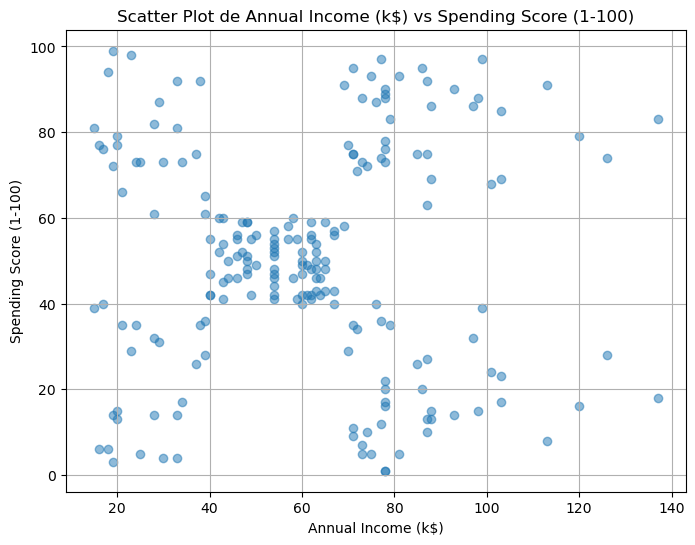

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

np.random.seed(0)

n_samples = 200
 
x_column = 'Annual Income (k$)'
y_column = 'Spending Score (1-100)'

# Criar o scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[x_column], X[y_column], alpha=0.5)
plt.title('Scatter Plot de {} vs {}'.format(x_column, y_column))
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

In [67]:
labels_true = np.ones(n_samples)

X = X.values

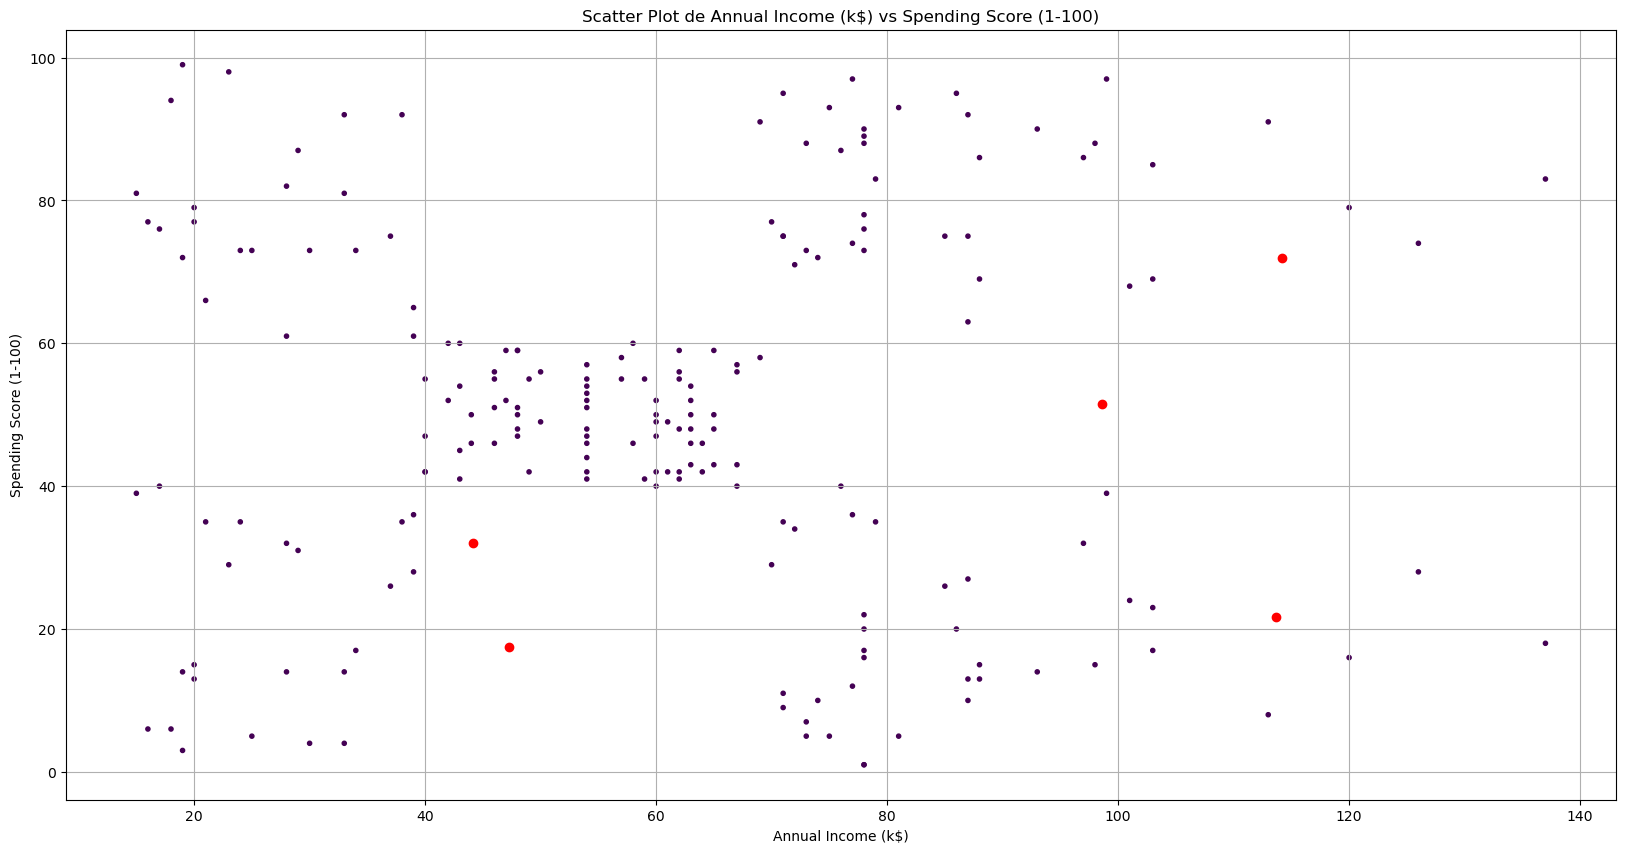

In [72]:
import random

# Function that gets the minimums and maximums from input features, and computes a random centroid.
def get_random_centroid(mm):
    n_f = mm.shape[1]
    centroids = np.ones((n_f))
    
    for i in np.arange(n_f):
        centroids[i] = random.uniform(mm[0,i], mm[1,i])
        
    return centroids
    
## Parameters
# number of clusters to be found
n_clusters = 5
# minimum error between previous and next centroid calculation
epsilon = 0.0001

# meta data from the dataset
n_features = X.shape[1]
min_max = np.ones((2,n_features))

# Find all mins and maxs for each feature so one can calculate random position of centroids
for i in np.arange(n_features):
    min_max[0,i] = min(X[:,i])
    min_max[1,i] = max(X[:,i])

# calculating the first centroids
centroids = np.ones((n_clusters,n_features))
for i in np.arange(n_clusters):
    centroids[i] = get_random_centroid(min_max)

plt.scatter(X[:,0], X[:,1], c=labels_true, marker=".")
plt.scatter(centroids[:,0], centroids[:,1], c="red")
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Scatter Plot de {} vs {}'.format(x_column, y_column))
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()


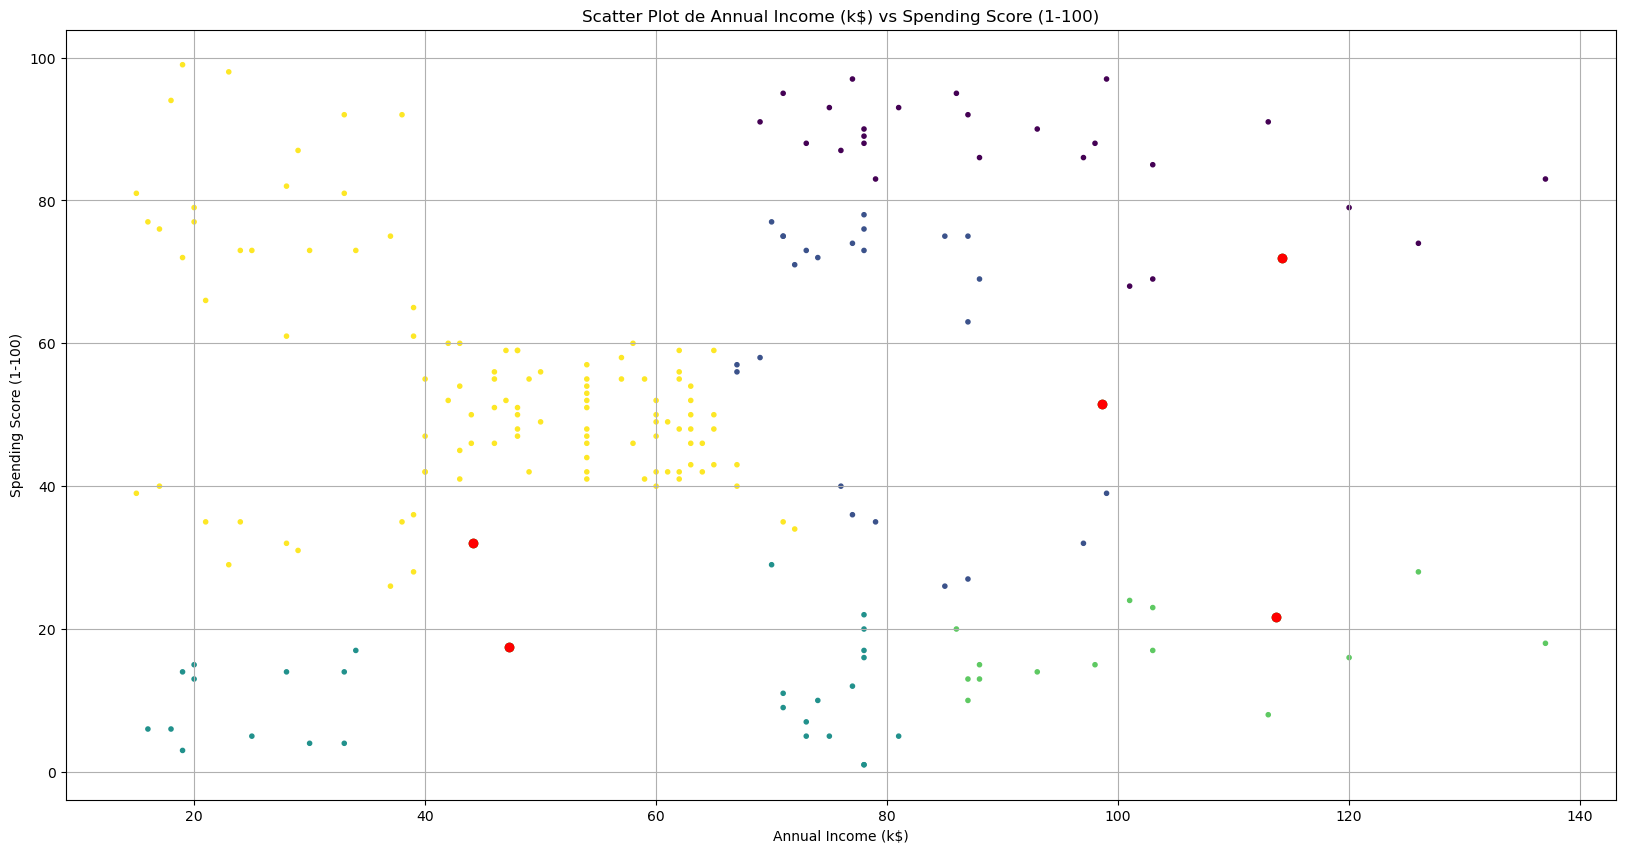

old_centroids: [[114.15644466  71.93974284]
 [ 98.60316797  51.44904152]
 [ 47.24134018  17.50909048]
 [113.68541699  21.63629131]
 [ 44.17341578  32.0347551 ]]
centroids: [[ 91.44        87.08      ]
 [ 78.83333333  59.66666667]
 [ 52.88888889  10.55555556]
 [102.14285714  16.71428571]
 [ 46.14545455  53.74545455]]
cluster distances: 92.01553619495577


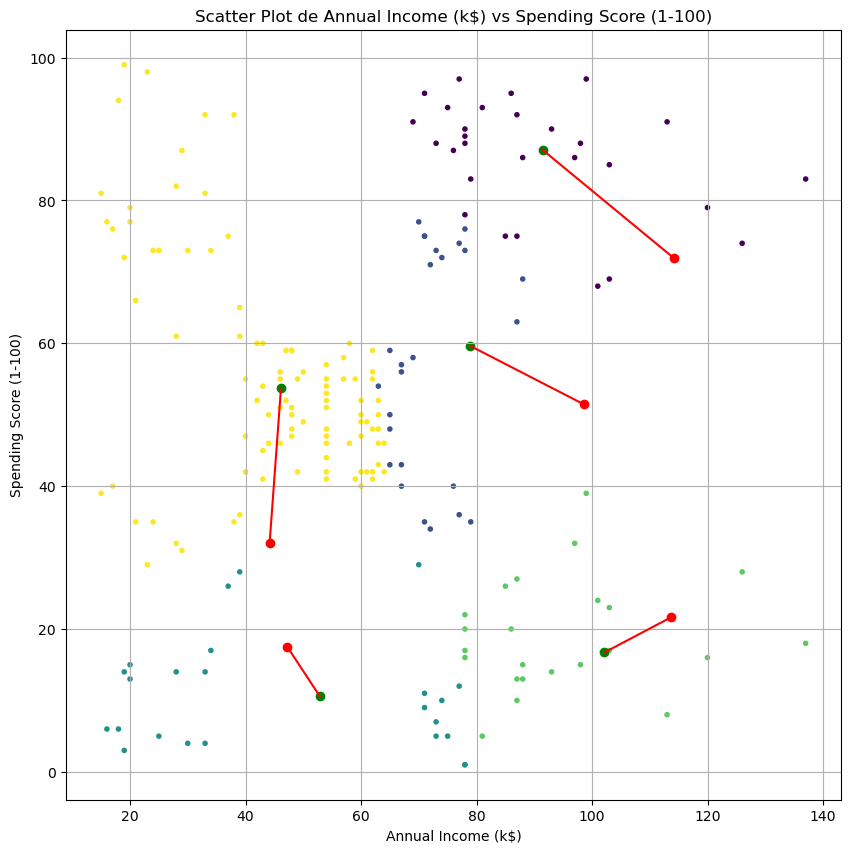

old_centroids: [[ 91.44        87.08      ]
 [ 78.83333333  59.66666667]
 [ 52.88888889  10.55555556]
 [102.14285714  16.71428571]
 [ 46.14545455  53.74545455]]
centroids: [[90.57142857 85.89285714]
 [72.07692308 57.15384615]
 [46.29166667 10.79166667]
 [95.26086957 19.04347826]
 [44.44444444 55.07070707]]
cluster distances: 24.702748979708627


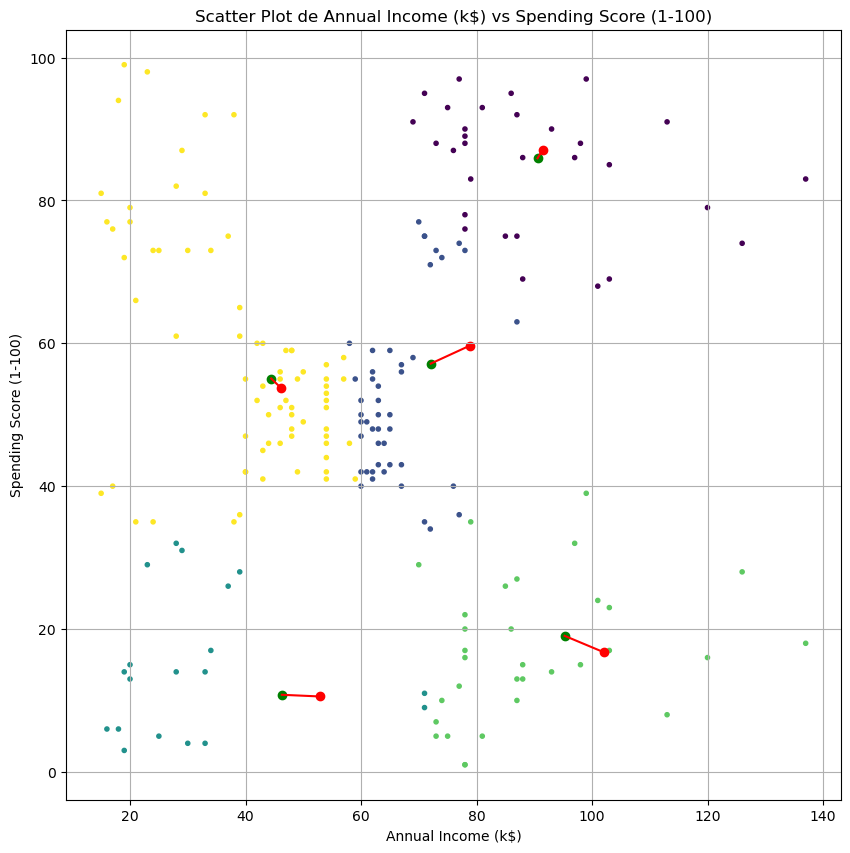

old_centroids: [[90.57142857 85.89285714]
 [72.07692308 57.15384615]
 [46.29166667 10.79166667]
 [95.26086957 19.04347826]
 [44.44444444 55.07070707]]
centroids: [[90.06666667 85.        ]
 [66.15217391 52.60869565]
 [31.21052632 14.78947368]
 [89.625      16.96875   ]
 [39.80821918 58.16438356]]
cluster distances: 35.67427954466352


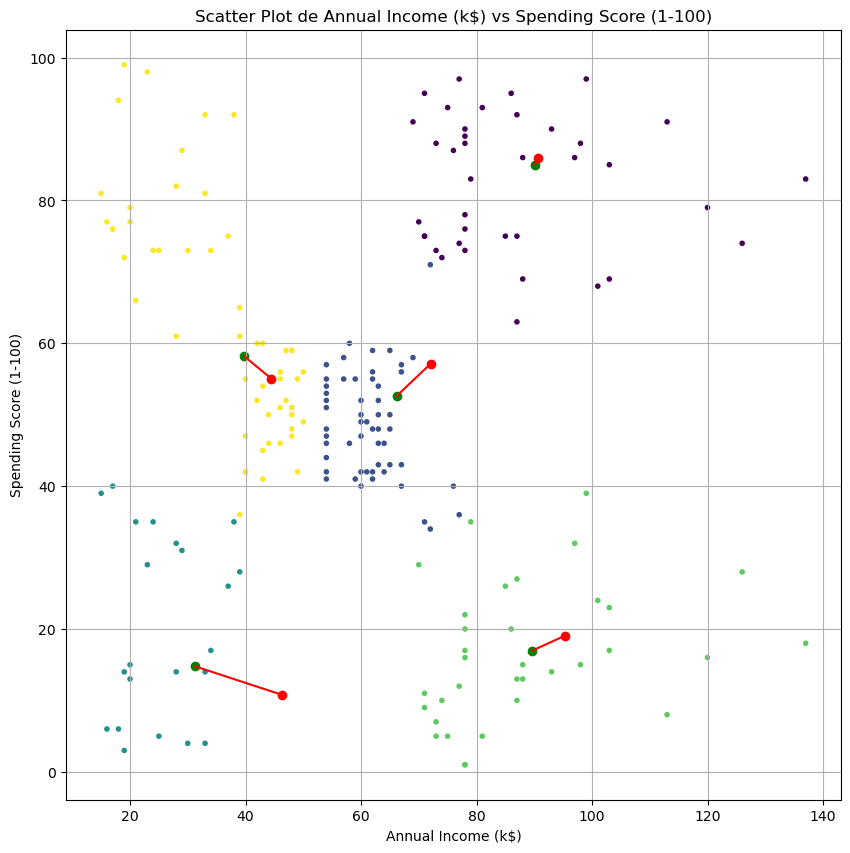

old_centroids: [[90.06666667 85.        ]
 [66.15217391 52.60869565]
 [31.21052632 14.78947368]
 [89.625      16.96875   ]
 [39.80821918 58.16438356]]
centroids: [[86.92105263 82.42105263]
 [61.5        48.66666667]
 [25.72727273 20.22727273]
 [88.52941176 16.55882353]
 [36.76923077 62.92307692]]
cluster distances: 24.703865777147186


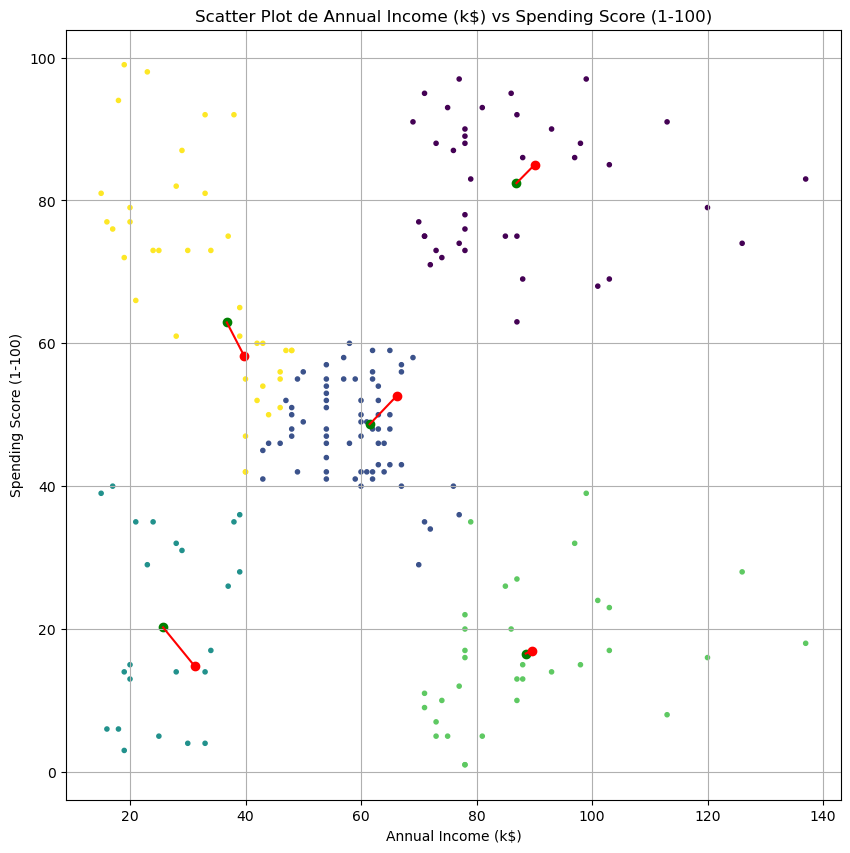

old_centroids: [[86.92105263 82.42105263]
 [61.5        48.66666667]
 [25.72727273 20.22727273]
 [88.52941176 16.55882353]
 [36.76923077 62.92307692]]
centroids: [[86.53846154 82.12820513]
 [58.68656716 47.97014925]
 [26.30434783 20.91304348]
 [89.09090909 16.18181818]
 [33.15789474 68.63157895]]
cluster distances: 11.707669405305149


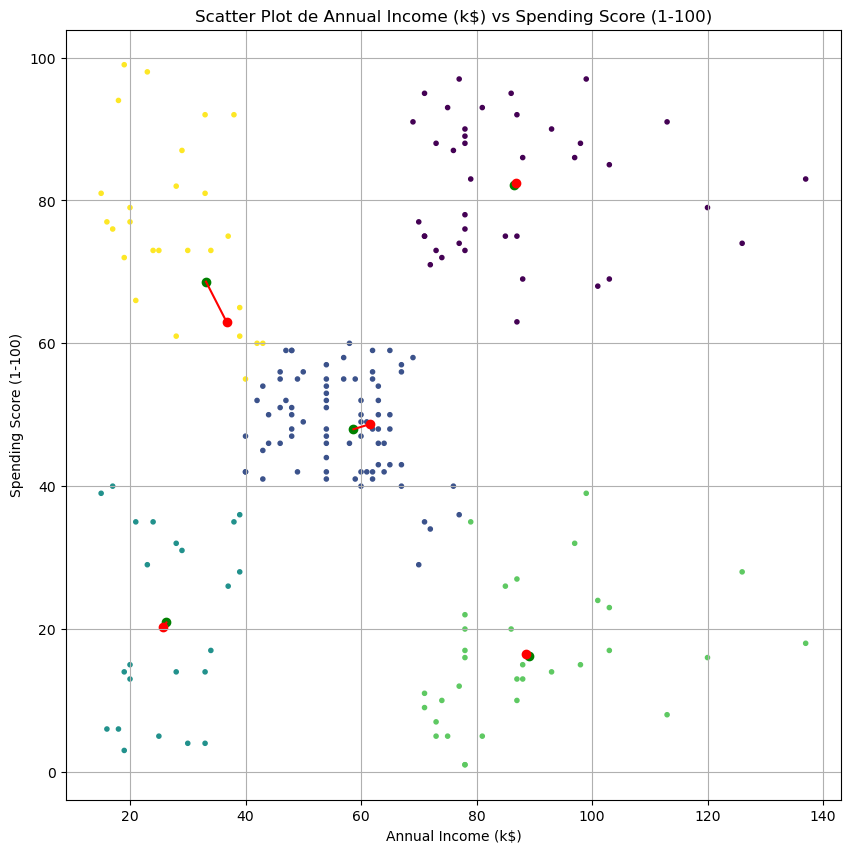

old_centroids: [[86.53846154 82.12820513]
 [58.68656716 47.97014925]
 [26.30434783 20.91304348]
 [89.09090909 16.18181818]
 [33.15789474 68.63157895]]
centroids: [[86.53846154 82.12820513]
 [56.48101266 48.60759494]
 [26.30434783 20.91304348]
 [89.09090909 16.18181818]
 [28.07692308 76.23076923]]
cluster distances: 11.43715679829346


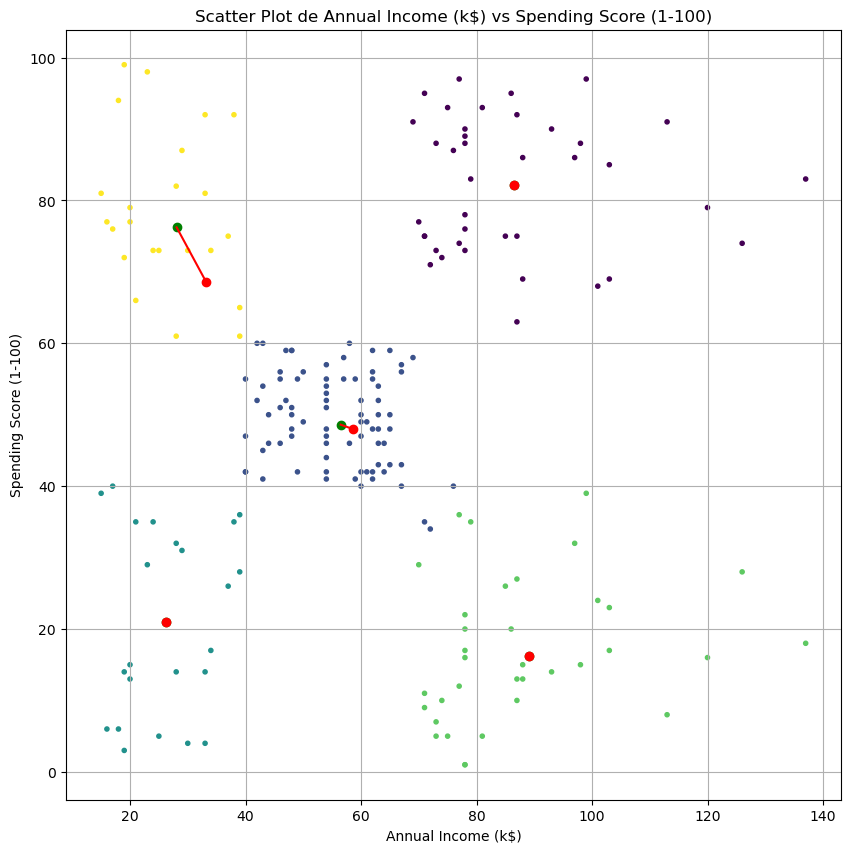

old_centroids: [[86.53846154 82.12820513]
 [56.48101266 48.60759494]
 [26.30434783 20.91304348]
 [89.09090909 16.18181818]
 [28.07692308 76.23076923]]
centroids: [[86.53846154 82.12820513]
 [55.5        49.375     ]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [26.30434783 78.56521739]]
cluster distances: 5.466322575023357


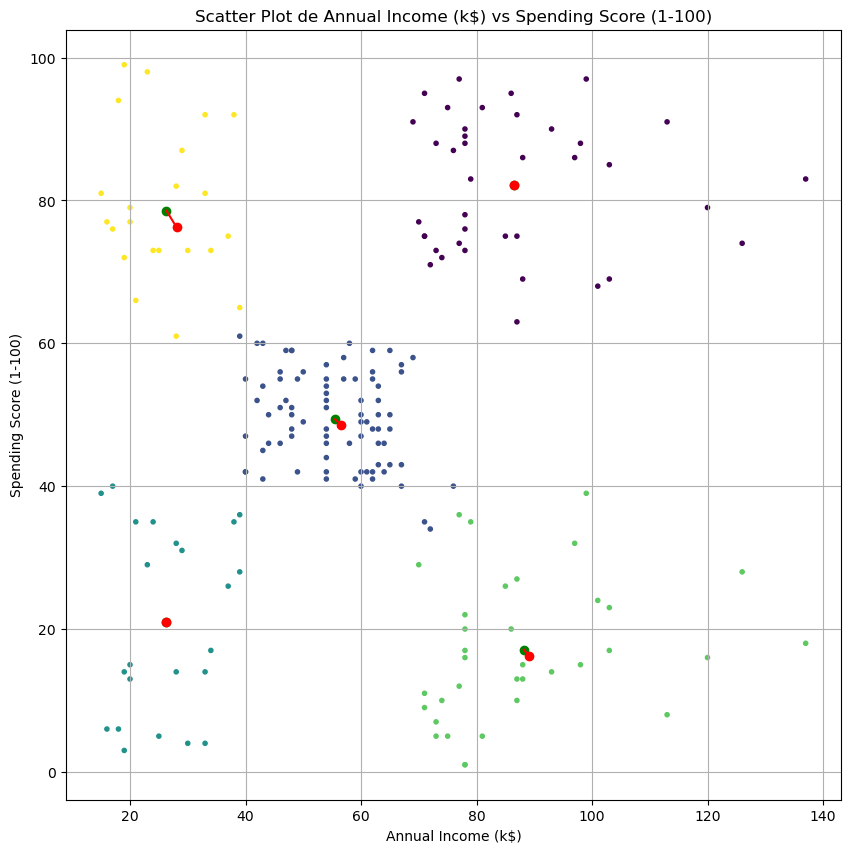

old_centroids: [[86.53846154 82.12820513]
 [55.5        49.375     ]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [26.30434783 78.56521739]]
centroids: [[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]
cluster distances: 1.23431795703122


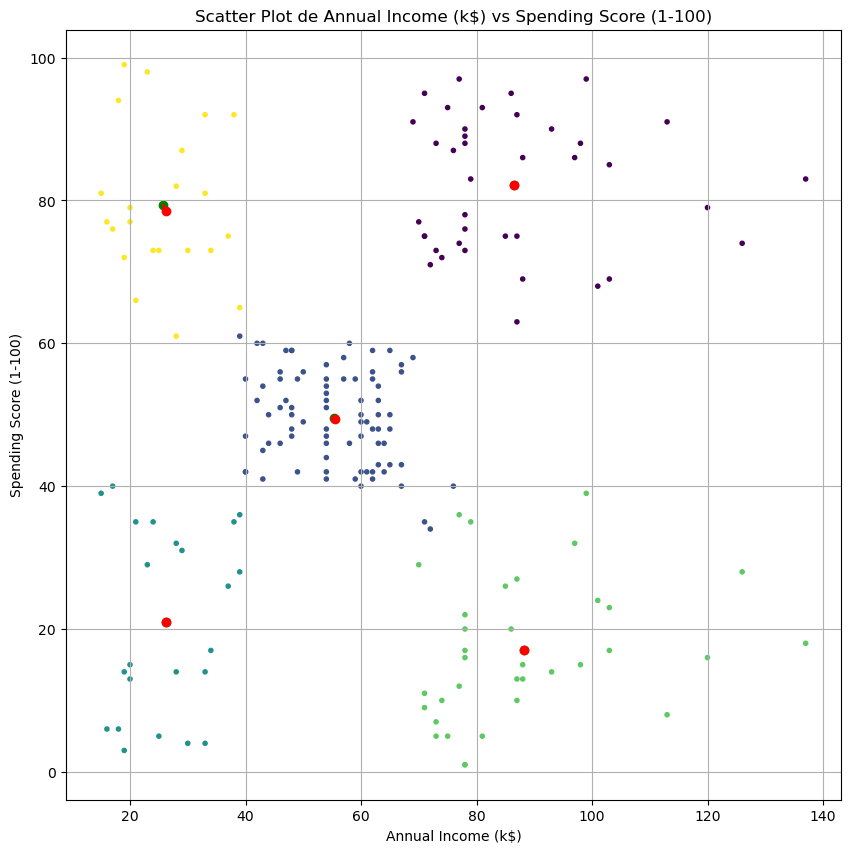

old_centroids: [[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]
centroids: [[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]
cluster distances: 0.0
Converged to a final solution


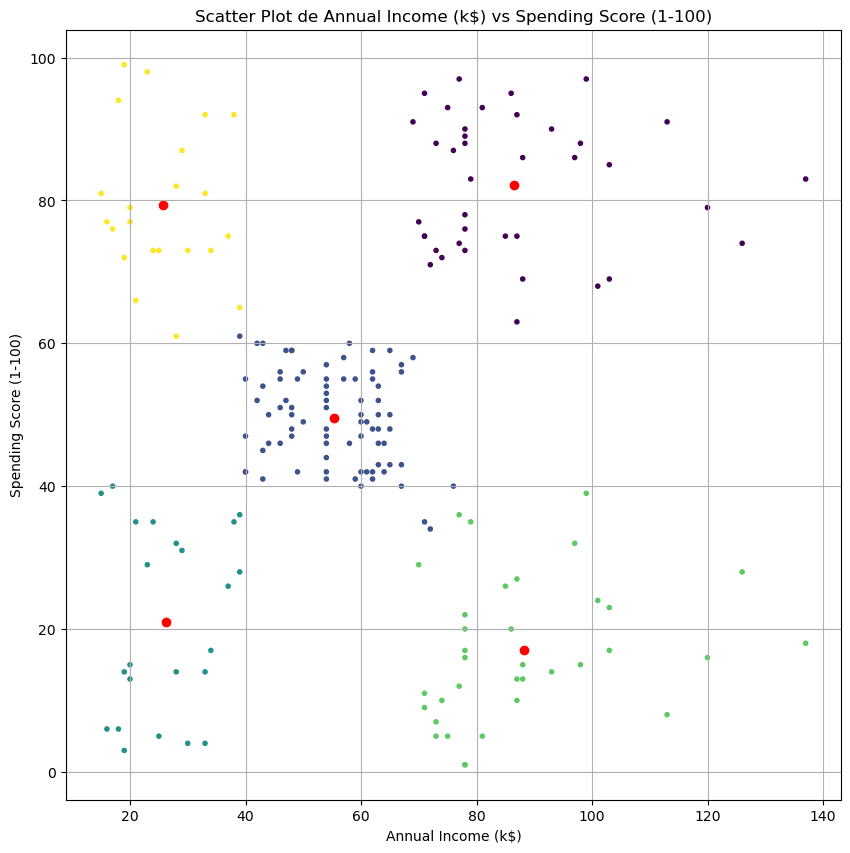

True labels


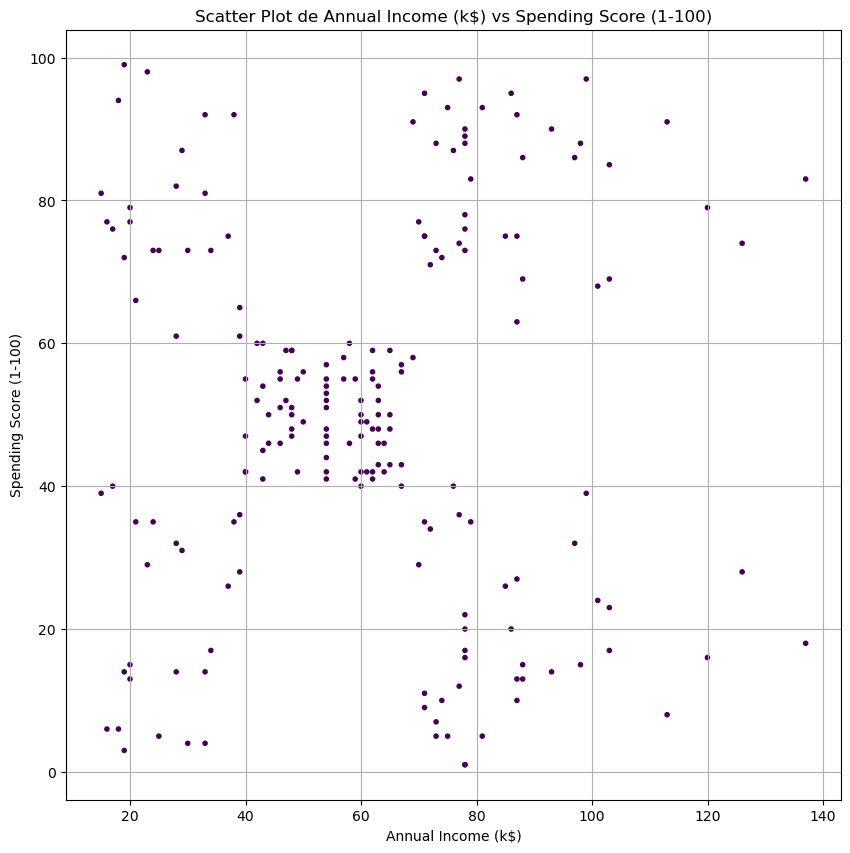

In [73]:
from scipy.spatial import distance

# buffer of centroids
old_centroids = centroids
cluster_dist = 9999

# until the distance between previous and new centroids is below epsilon
while cluster_dist > epsilon:
    
    # final cluster per sample
    clustering_vals = np.ones(X.shape[0])

    # for all points, calculate the distance towards each centroid
    for i in np.arange(X.shape[0]):
        temp_dst = 9999
        c_index = -1
        # for all clusters
        for c in np.arange(n_clusters):
            dst = distance.euclidean(centroids[c], X[i])
            if dst < temp_dst:
                temp_dst = dst
                c_index = c

        clustering_vals[i] = c_index

    ###################################################################################
    plt.scatter(X[:,0], X[:,1], c=clustering_vals, marker=".")
    plt.scatter(centroids[:,0], centroids[:,1], c="green")
    plt.scatter(old_centroids[:,0], old_centroids[:,1], c="red")
    for c in np.arange(n_clusters):
        plt.plot([old_centroids[c,0], centroids[c,0]],[old_centroids[c,1], centroids[c,1]],'r')
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.title('Scatter Plot de {} vs {}'.format(x_column, y_column))
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.show()
    ###################################################################################
    
    old_centroids = centroids.copy()
    
    for c in np.arange(n_clusters):
        # filter samples per cluster
        filt_samples = X[np.where(clustering_vals == c),:][0]
        # calculate the mean value for all samples in a cluster
        result = np.sum(filt_samples, axis=0) / filt_samples.shape[0]
        # update cluster
        centroids[c] = result

    print("old_centroids:" , old_centroids)
    print("centroids:", centroids)
    
    # calculate distances between previous and next centroids
    cluster_dist = np.sum([distance.euclidean(centroids[c], old_centroids[c]) for c in np.arange(n_clusters)])
    print("cluster distances:" , cluster_dist)
    
###################################################################################
print("Converged to a final solution")
plt.scatter(X[:,0], X[:,1], c=clustering_vals, marker=".")
plt.scatter(centroids[:,0], centroids[:,1], c="red")
plt.rcParams['figure.figsize'] = [10, 10]
plt.title('Scatter Plot de {} vs {}'.format(x_column, y_column))
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()


print("True labels")
plt.scatter(X[:,0], X[:,1], c=labels_true, marker=".")
plt.rcParams['figure.figsize'] = [10, 10]
plt.title('Scatter Plot de {} vs {}'.format(x_column, y_column))
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

Análise

* Número de perfis de clientes segmentados;
* Principais características dos clientes segmentados;
* Perfil dos clientes maioritários e minoritários / qual o perfil mais dominante e menos
dominante;
* Existem clusters bem separados ou onde a sua diferenciação não é tão clara?

Spending Score X Age: Percebe-se uma divisão em três faixas etárias: de 0 a 30 anos existe uma relação média de Spending Score; de 30 até 60 anos uma relação forte do Score de gastos; e acima de 60 anos uma relação fraca do Score de gastos.

Em Rendimento anual X Score de Gastos, temos: 5 segmentos; entre 10k e 40k de rendimento anual tem maior (2 clustering) escore de gastos, e entre 70k e 100k de rendimento anual (2 clustering); entre 40k e 70k médio escore (1 clustering).

Assim, percebe-se que o perfil principal dos clientes analisados são de 30 a 60 anos de idade, de pessoas que possuem rendimento entre 10k e 40k, ou entre 70k e 100k. Quando cruzamos Rendimento anual X Score de Gastos, percebe-se 5 clusters claramente diferentes. No cruzamento Spending Score X Age percebe-se de forma relativamente clara a separação em 3 clusters. Nos demais cruzamentos não é tão clara a distinção entre clusters. Rendimento anual X Score de gastos não se distingue cluster algum perceptível.

# DBscan

In [1]:
import pandas as pd

# Carregar o conjunto de dados .csv
df = pd.read_csv('segmentation data.csv')
#X = dados[['feature1', 'feature2']].values  # Extrair características
#y = dados['target'].values  # Extrair alvos

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [8]:
# Seleção das colunas desejadas
X = df[['Gender', 'Age']]

In [9]:
import numpy as np

n_samples = 200

labels_true = np.ones(n_samples)

X = X.values

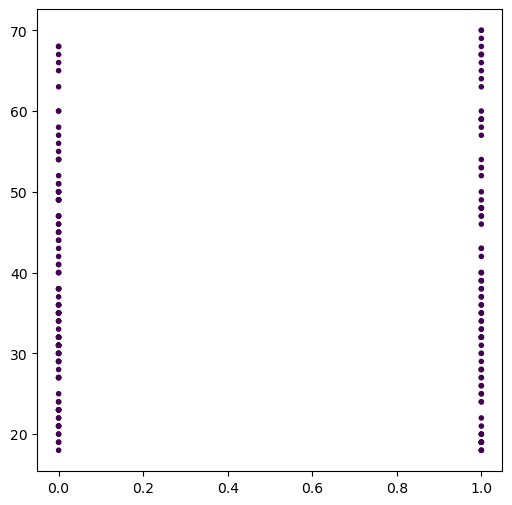

In [10]:
import matplotlib.pyplot as plt
labels_true = np.ones(n_samples)


plt.scatter(X[:,0], X[:,1], c=labels_true, marker=".")
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

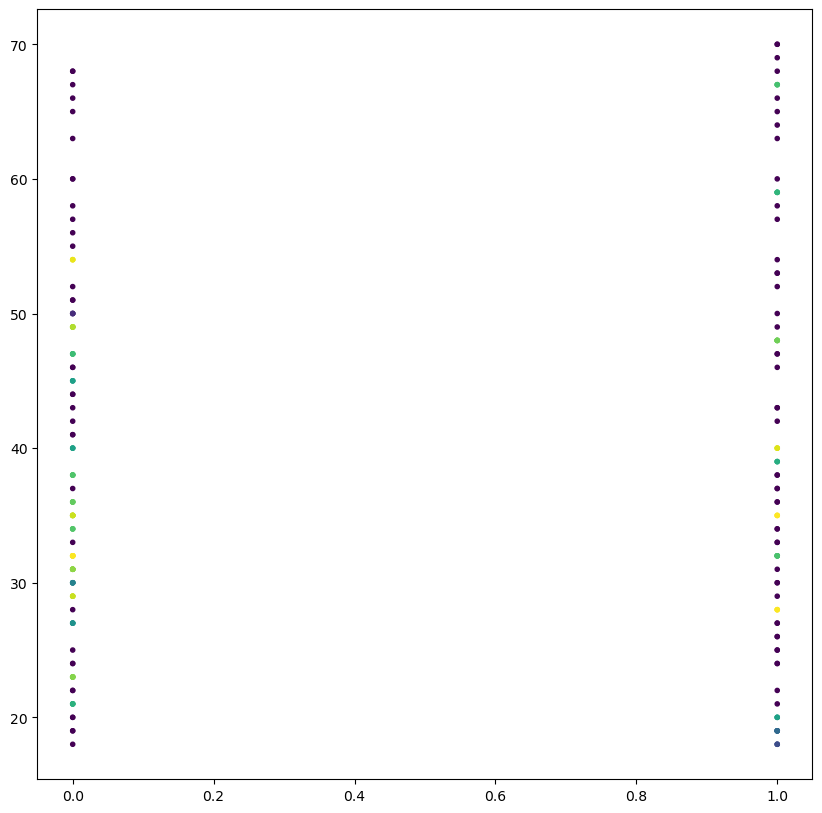

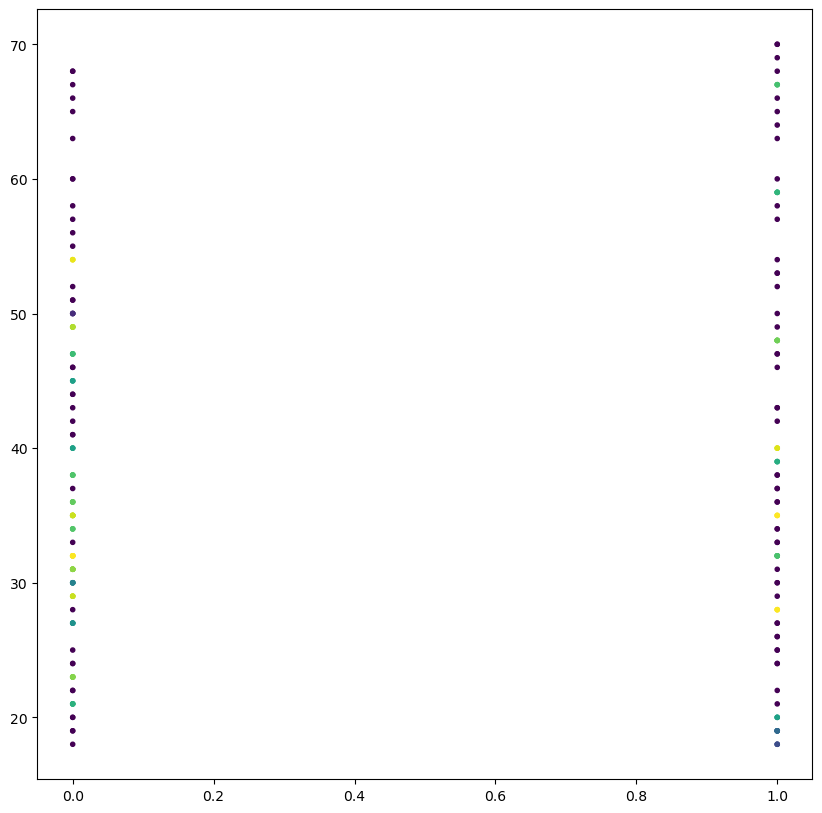

In [11]:
import random
from scipy.spatial import distance
from IPython.display import display, clear_output

## Parameters
min_samples = 2
eps = 0.2 #3 or 0.2

# meta data from the dataset
n_features = X.shape[1]
cluster_num = -1

# remaining list of samples to visit
remaining = dict()
# list of clustered samples
clustered = dict()
# index of all visited samples
visited = []
# tuple with index and actual samples to visit. those might be core or border points
queue = []

# include all samples into remaining points to visit
for i in np.arange(X.shape[0]):
    remaining[i] = X[i]

# print(X.shape)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
plt.rcParams['figure.figsize'] = [6, 6]

for i in np.arange(500):
    
    ##################################################################################
    # if empty queue, which might indicate the ending of a cluster, one needs to pic a remaining sample at random
    if len(queue) == 0:
        # choose random sample
        rand_idx = list(remaining.keys())[random.randint(0,len(remaining)-1)]
        current_sample = remaining[rand_idx]
        
        # new cluster label
        cluster_num += 1
    
    ##################################################################################
    else:
        # next sample in queue
        temp = queue.pop(0)
        rand_idx = temp[0]
        current_sample = temp[1]

    # calculate all sample distances towards the current sample
    # n,2 matrix, where the first column is the sample index, and the second is the distance to current_sample
    distance_vals = np.array([[int(i), distance.euclidean(current_sample, X[i])] for i in np.arange(X.shape[0])])

    # filter sample according to eps - validation of the first algorithm parameter
    filtered_distances = distance_vals[np.where(distance_vals[:,1] < eps), :][0]

    # sort by distance
    sorted_distances = filtered_distances[filtered_distances[:,1].argsort()]
    
    # validation of the first algorithm parameter
    if sorted_distances.shape[0] > min_samples:
        if len(queue) == 0:
            clustered[rand_idx] = cluster_num
        indexes = sorted_distances[:,0].astype(int)
            
        #Add to queue and remove new samples
        for idx in indexes:
            clustered[idx] = cluster_num
            ############################
            # verify if new neighbor samples are already in queue
            pres = False
            for q in queue:
                if q[0] == idx:
                    pres = True
                    break
            if not pres and idx != rand_idx and idx not in visited:
                queue.append((idx,X[idx]))
                remaining.pop(idx, None)        
    
    # update visited points
    visited.append(rand_idx)

    print("remaining:" , len(remaining))
    print("in queue:" , len(queue))
    labels = np.array([-1]*n_samples)
    
    indexes = list(clustered.keys())
    labels[indexes] = list(clustered.values())
    labels[rand_idx] = 2

    ax.cla()
    ax.scatter(X[:,0], X[:,1], c=labels, marker=".")
    
    clear_output(wait = True)
    display(fig)
#     plt.pause(0.1)

O algortimo do DBscan naõ é apropriado para esses tipos de dados, mas quando se considera o gênero X Spending Score, percebendo-se um cliente maioritário de mulheres, que apresentam score de gastos entre 40 e 60, e homens de idade 25 a 40 anos.

Clientes minoritários são mulheres acima de 60 anos, e pessoas com Score de gastos entre 0 a 40, e rendimento anual entre. 40 a 60